<a href="https://colab.research.google.com/github/rajatsharma369007/coursera_course_tensorflow/blob/master/Course_3_Week_3_Lesson_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Layer LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0-rc1


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0-rc1


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteEKVMQ4/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteEKVMQ4/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteEKVMQ4/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder

In [8]:
train_dataset

<DatasetV1Adapter shapes: ((None,), ()), types: (tf.int64, tf.int64)>

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [12]:
for i in train_dataset:
  print(i)

(<tf.Tensor: shape=(64, 1241), dtype=int64, numpy=
array([[2016,   12,  149, ...,    0,    0,    0],
       [  62,   32,    9, ...,    0,    0,    0],
       [  62,  538, 7968, ...,    0,    0,    0],
       ...,
       [6175, 7961,  566, ...,    0,    0,    0],
       [  12,  574,    7, ...,    0,    0,    0],
       [ 404,    6,    1, ...,    0,    0,    0]])>, <tf.Tensor: shape=(64,), dtype=int64, numpy=
array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0])>)
(<tf.Tensor: shape=(64, 1515), dtype=int64, numpy=
array([[4704,   40,   25, ...,    0,    0,    0],
       [  12,  800,  359, ...,    0,    0,    0],
       [ 518,   51,    1, ...,    0,    0,    0],
       ...,
       [  12,  284,   39, ...,    0,    0,    0],
       [2991, 7961, 5006, ...,    0,    0,    0],
       [  62,   57,    7, ...,    0,    0,    0]])>, <tf.Ten

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 990s 3s/step - loss: 0.5774 - accuracy: 0.6932 - val_loss: 0.4601 - val_accuracy: 0.7993
Epoch 2/10
391/391 [==============================] - 1018s 3s/step - loss: 0.3738 - accuracy: 0.8452 - val_loss: 0.4184 - val_accuracy: 0.8168
Epoch 3/10
391/391 [==============================] - 1014s 3s/step - loss: 0.2794 - accuracy: 0.8928 - val_loss: 0.4297 - val_accuracy: 0.8517
Epoch 4/10
391/391 [==============================] - 1022s 3s/step - loss: 0.2288 - accuracy: 0.9148 - val_loss: 0.4200 - val_accuracy: 0.8445
Epoch 5/10
391/391 [==============================] - 1029s 3s/step - loss: 0.2465 - accuracy: 0.9008 - val_loss: 0.5067 - val_accuracy: 0.8182
Epoch 6/10
391/391 [==============================] - 1031s 3s/step - loss: 0.1839 - accuracy: 0.9324 - val_loss: 0.4992 - val_accuracy: 0.8236
Epoch 7/10
391/391 [==============================] - 1030s 3s/step - loss: 0.1585 - accuracy: 0.9430 - val_loss: 0.5668 - val_accuracy: 

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

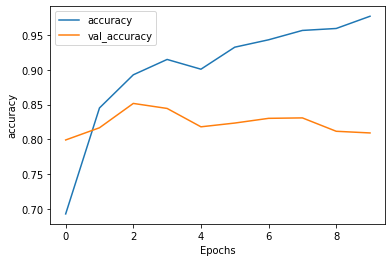

In [18]:
plot_graphs(history, 'accuracy')

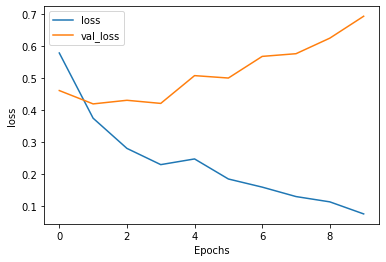

In [19]:
plot_graphs(history, 'loss')